In [963]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [964]:
data_train=pd.read_csv('202510_Laboratorio 1 - Regresión_train_data.csv')

In [965]:
data_train.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
384,1237648702966661167,183.826034,-1.109846,18.35799,16.40675,15.52149,15.10122,14.76636,752,1,269,0.776626,0,GALAXY,0.075943,52023,0.001302,-0.002371
2426,1237648675604267010,240.119673,1.174082,17.99823,17.69650,17.54185,17.39625,17.22874,745,6,544,0.315765,1,QSO,0.428585,51693,0.002303,0.000672
1212,1237648720167436469,203.871539,-0.934897,18.91506,17.83475,17.45376,17.18355,17.05292,756,1,588,0.816541,1,GALAXY,0.072157,51955,0.003191,0.003724
2351,1237648720167698476,204.489183,-0.946459,18.14583,17.65397,17.98518,18.25246,18.48604,756,1,592,0.811672,1,STAR,-0.000517,52427,0.003269,0.001356
1071,1237648722833637422,162.421555,1.061277,18.63067,17.59079,17.20782,17.05621,17.01408,756,6,311,0.821786,1,STAR,0.000583,54213,0.001238,0.000264


# Limpieza de datos
## Completitud

No hay datos nulos en ninguna columna del dataframe por lo tanto estan completos.

In [966]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objid     4000 non-null   int64  
 1   ra        4000 non-null   float64
 2   dec       4000 non-null   float64
 3   u         4000 non-null   float64
 4   g         4000 non-null   float64
 5   r         4000 non-null   float64
 6   i         4000 non-null   float64
 7   z         4000 non-null   float64
 8   run       4000 non-null   int64  
 9   camcol    4000 non-null   int64  
 10  field     4000 non-null   int64  
 11  score     4000 non-null   float64
 12  clean     4000 non-null   int64  
 13  class     4000 non-null   object 
 14  redshift  4000 non-null   float64
 15  mjd       4000 non-null   int64  
 16  rowv      4000 non-null   float64
 17  colv      4000 non-null   float64
dtypes: float64(11), int64(6), object(1)
memory usage: 562.6+ KB


## Duplicidad

Se verifica que hay duplicidad completa en 17 columnas y posteriormente se eliminan.

In [967]:
data_train[data_train.duplicated(keep=False)]

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
109,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,S,-0.000066,51615,-0.000639,0.000270
114,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017
299,1237648721756225804,154.036159,0.417930,19.50457,18.08980,17.29931,16.88134,16.56668,756,4,255,0.892071,1,GALAXY,0.096783,51883,-0.000413,-0.002812
629,1237648720687988788,166.623017,-0.546630,19.55528,17.73928,16.86703,16.44810,16.11761,756,2,339,0.879096,1,GALAXY,0.086721,51900,0.001004,-0.001857
642,1237648720715710772,229.932143,-0.607750,18.34448,17.39741,17.08713,16.86085,16.67511,756,2,762,0.846381,1,GALAXY,0.037010,51689,0.004917,-0.009145
718,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,GALAXY,0.112827,51673,0.008122,0.012494
719,1237648721788993889,228.864817,0.317359,18.88618,17.66549,17.09694,16.72708,16.56451,756,4,755,0.881142,1,GALAXY,0.082665,51689,-0.003803,-0.000683
856,1237648705679065271,247.896821,0.990909,16.74659,15.61752,15.43460,15.40196,15.40794,752,6,697,0.842783,1,STAR,0.000073,51671,0.002149,-0.000930
897,1237646382079672642,94.883887,0.990686,17.03847,15.47224,15.10297,14.97051,14.88297,211,6,360,0.806983,1,S,0.000012,52931,-0.001483,0.001376


In [968]:
#Se borran directamente del dataframe los registros duplicados completos
data_train=data_train.drop_duplicates(keep = "first", inplace= False,ignore_index =True)
data_train

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,STAR,1.521540e-04,54891,0.000675,0.000324
3979,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,STAR,4.182837e-05,53242,-0.000440,-0.000301
3980,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,GALAXY,8.160563e-02,51985,0.011348,0.005854
3981,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,GALAXY,8.744828e-02,55888,-0.004486,-0.006072


In [969]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objid     3983 non-null   int64  
 1   ra        3983 non-null   float64
 2   dec       3983 non-null   float64
 3   u         3983 non-null   float64
 4   g         3983 non-null   float64
 5   r         3983 non-null   float64
 6   i         3983 non-null   float64
 7   z         3983 non-null   float64
 8   run       3983 non-null   int64  
 9   camcol    3983 non-null   int64  
 10  field     3983 non-null   int64  
 11  score     3983 non-null   float64
 12  clean     3983 non-null   int64  
 13  class     3983 non-null   object 
 14  redshift  3983 non-null   float64
 15  mjd       3983 non-null   int64  
 16  rowv      3983 non-null   float64
 17  colv      3983 non-null   float64
dtypes: float64(11), int64(6), object(1)
memory usage: 560.2+ KB


No encontramos ningun duplicado parcial de objid, el cual debe ser un valor unico

In [970]:
data_train[data_train.duplicated(subset = 'objid', keep = False)].sort_values('objid')

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv


## Consistencia
Se encuentran inconsistencias con los valores que pertenecen a la columna class. Se implementa una correccion de estos.

In [971]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

In [972]:
data_train['class'] = data_train['class'].replace('S','STAR')
data_train['class'] = data_train['class'].replace('QUASAR','QSO')
data_train['class'] = data_train['class'].replace('G','GALAXY')

In [973]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

## Estandarizacion
Teniendo en cuenta que class es una clase categorica, se decidio usar One Hot Encoder para trabajar mejor con esa variable posteriormente, teniendo en cuenta la correlacion entre los tre valores que podian tomar en class.

In [974]:
# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos categóricos
encoded_df = pd.DataFrame(encoder.fit_transform(data_train[['class']]))

# Agregar nombres a las columnas codificadas
encoded_df.columns = encoder.get_feature_names_out(['class'])

# Concatenar el DataFrame original con el DataFrame codificado
final_df = pd.concat([data_train, encoded_df], axis=1).drop(['class'], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   objid         3983 non-null   int64  
 1   ra            3983 non-null   float64
 2   dec           3983 non-null   float64
 3   u             3983 non-null   float64
 4   g             3983 non-null   float64
 5   r             3983 non-null   float64
 6   i             3983 non-null   float64
 7   z             3983 non-null   float64
 8   run           3983 non-null   int64  
 9   camcol        3983 non-null   int64  
 10  field         3983 non-null   int64  
 11  score         3983 non-null   float64
 12  clean         3983 non-null   int64  
 13  redshift      3983 non-null   float64
 14  mjd           3983 non-null   int64  
 15  rowv          3983 non-null   float64
 16  colv          3983 non-null   float64
 17  class_GALAXY  3983 non-null   float64
 18  class_QSO     3983 non-null 

In [975]:
final_df.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
3674,1237648722830098533,154.266756,1.056124,17.83175,16.67174,16.10953,15.74649,15.50305,756,6,257,0.834117,1,0.045109,51883,0.000930,0.001481,1.0,0.0,0.0
1125,1237648704047546574,200.188567,-0.413797,19.43589,18.51427,17.29509,16.74747,16.43007,752,3,378,0.858327,1,0.220834,51984,0.001667,0.000597,1.0,0.0,0.0
3059,1237648722833833994,162.793875,1.129810,16.16288,14.83639,14.35541,14.18335,14.13665,756,6,314,0.845971,1,0.000024,54213,0.001318,-0.000853,0.0,0.0,1.0
2210,1237648722279530820,123.046728,0.746038,19.29529,18.19892,17.81605,17.67220,17.64968,756,5,48,0.845550,1,0.000322,53003,0.003339,-0.000021,0.0,0.0,1.0
3029,1237648705135837564,233.427016,0.546217,19.00815,17.93777,17.44642,17.11042,16.95849,752,5,600,0.877689,0,0.081203,51989,0.009790,-0.000889,1.0,0.0,0.0


## Modelo

Se quiere generar una regresion así:

$$y_i = \beta_0+ \sum_{i=0}^{n} \beta_i \cdot x_i$$

Donde $y_i$ es redshift y $x_i$ son las características elejidas

## Elección de variables

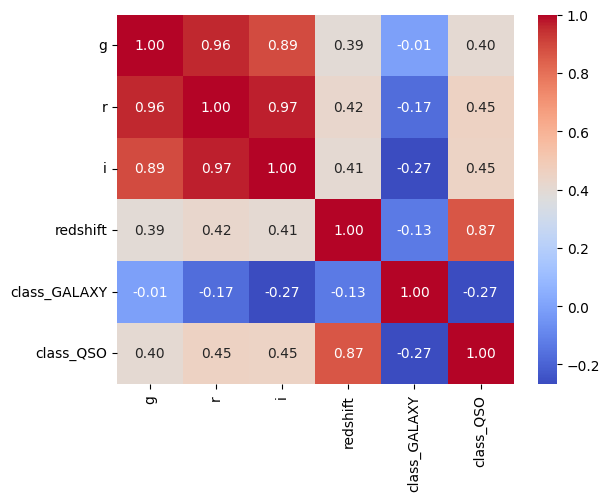

<Figure size 2000x1200 with 0 Axes>

In [976]:
sns.heatmap(final_df.drop(columns=['rowv','colv','clean','score','field','camcol','dec','class_STAR','objid','mjd','run','ra','u','z']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(20,12))
plt.show()

In [977]:
final_df[final_df['redshift'].isna()== False]

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,8.780529e-05,54140,0.002418,0.001363,0.0,0.0,1.0
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,8.619995e-02,51955,0.008650,0.007056,1.0,0.0,0.0
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,1.330486e-01,51913,0.003938,-0.002028,1.0,0.0,0.0
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,8.636355e-02,51959,0.001839,0.001160,1.0,0.0,0.0
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,-4.090000e-08,54562,0.001929,-0.000465,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,1.521540e-04,54891,0.000675,0.000324,0.0,0.0,1.0
3979,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,4.182837e-05,53242,-0.000440,-0.000301,0.0,0.0,1.0
3980,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,8.160563e-02,51985,0.011348,0.005854,1.0,0.0,0.0
3981,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,8.744828e-02,55888,-0.004486,-0.006072,1.0,0.0,0.0


In [978]:
final_df=final_df.drop(columns=['rowv','colv','clean','score','field','camcol','dec','class_STAR','objid','mjd','run','ra','u','z'])
final_df

,g,r,i,redshift,class_GALAXY,class_QSO
0,17.62099,17.03464,16.82993,8.780529e-05,0.0,0.0
1,17.62940,17.01465,16.62059,8.619995e-02,1.0,0.0
2,17.67693,16.82551,16.42307,1.330486e-01,1.0,0.0
3,17.77765,17.38575,17.11128,8.636355e-02,1.0,0.0
4,19.05355,19.46278,19.75660,-4.090000e-08,0.0,0.0
...,...,...,...,...,...,...
3978,17.89273,17.54372,17.41363,1.521540e-04,0.0,0.0
3979,15.96142,15.36014,15.14572,4.182837e-05,0.0,0.0
3980,18.32555,17.86916,17.57512,8.160563e-02,1.0,0.0
3981,17.31450,16.36573,15.91760,8.744828e-02,1.0,0.0


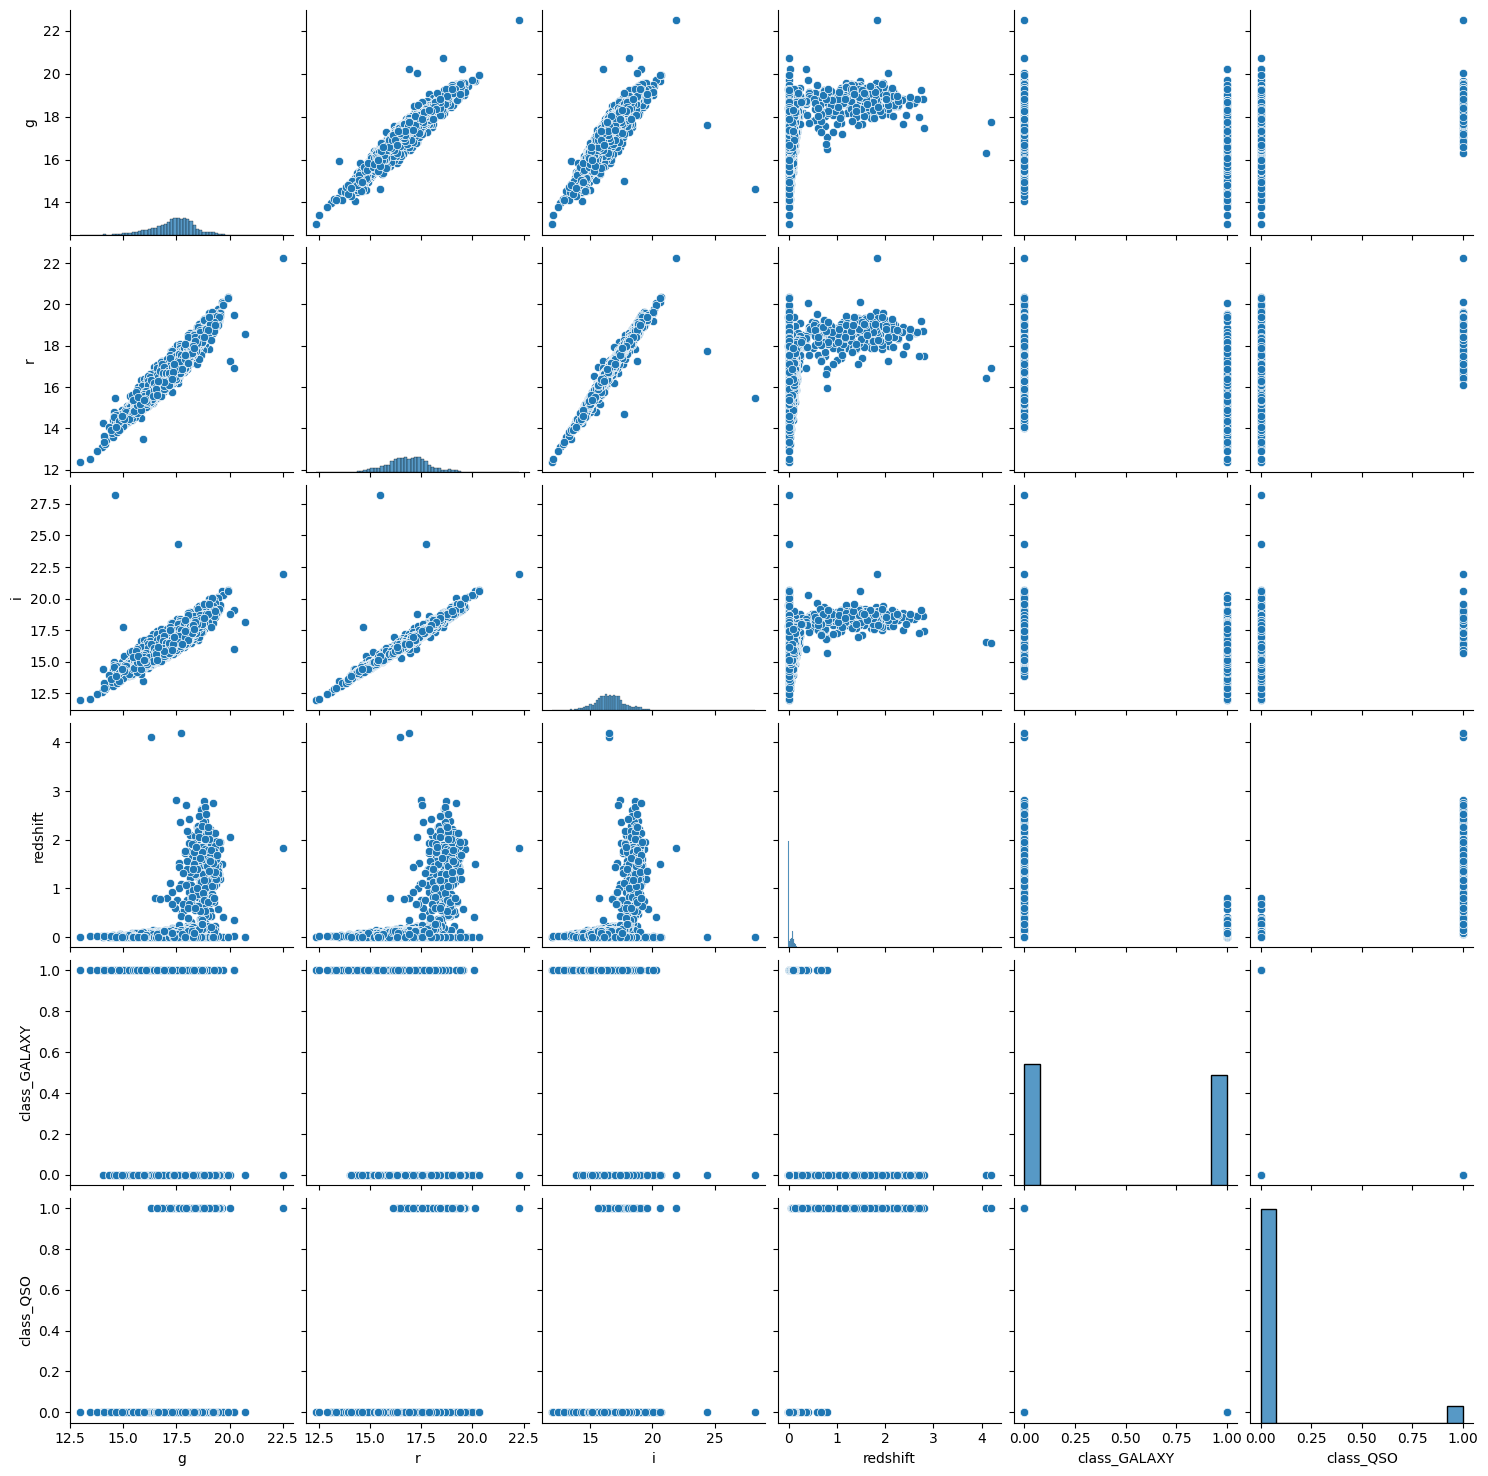

In [979]:
sns.pairplot(final_df, kind="scatter")

## Normalización datos

## Partición modelo

In [980]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns='redshift'), final_df["redshift"], test_size=0.2, random_state=1)

In [981]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_train , y_train)

LinearRegression()

In [982]:
pd.DataFrame({"columns": list(final_df.columns.drop('redshift')), "coef": modelo.coef_})

,columns,coef
0,g,-0.004353
1,r,0.018995
2,i,0.001790
3,class_GALAXY,0.084049
4,class_QSO,1.303230


In [983]:
modelo.intercept_

-0.27306039628469625

## Validación

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [984]:
import sklearn.metrics as metrics
import numpy as np

In [985]:
print("Train:", metrics.mean_absolute_error(y_train, modelo.predict(X_train)))
print("Test:", metrics.mean_absolute_error(y_test, modelo.predict(X_test)))

Train: 0.057878311220308426
Test: 0.06563249583716396


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [986]:
print("Train:", np.sqrt(metrics.mean_squared_error(y_train, modelo.predict(X_train))))
print("Test:", np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))

Train: 0.18675775418614626
Test: 0.18441067248777385


## Normalización

In [987]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [988]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [989]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [990]:
pd.DataFrame({"columns": list(final_df.columns.drop('redshift')), "coef": pipeline["model"].coef_})

,columns,coef
0,g,-0.004131
1,r,0.019987
2,i,0.002033
3,class_GALAXY,0.041974
4,class_QSO,0.331811


In [991]:
pipeline["model"].intercept_

0.13120617209792407

In [992]:
y_train.mean(), y_test.mean()

(0.13120617209792407, 0.14662513903702384)

In [993]:
print("MAE:")
print("Train:", metrics.mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", metrics.mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 0.05787831122030846
Test: 0.065632495837164

RMSE:
Train: 0.18675775418614626
Test: 0.18441067248777382


# Validación

## Colinaliedad

<AxesSubplot: >

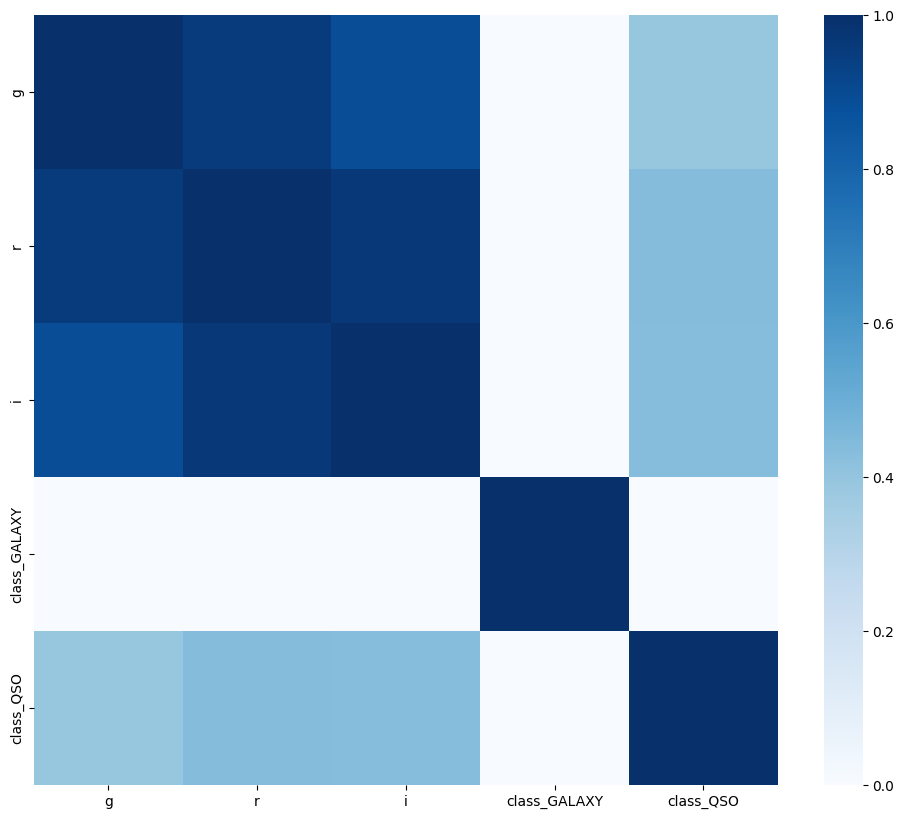

In [994]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [995]:
X_train.corr()

,g,r,i,class_GALAXY,class_QSO
g,1.000000,0.956830,0.889160,-0.000978,0.390837
r,0.956830,1.000000,0.967651,-0.163135,0.436921
i,0.889160,0.967651,1.000000,-0.258869,0.432337
class_GALAXY,-0.000978,-0.163135,-0.258869,1.000000,-0.260589
class_QSO,0.390837,0.436921,0.432337,-0.260589,1.000000


Si probamos con otro modelo en donde se eliminan las variables con correlación mayor al 95% obtenemos este modelo

In [996]:
features2 = ['r','class_GALAXY', 'class_QSO']

In [997]:
X_train[features2].corr()

,r,class_GALAXY,class_QSO
r,1.000000,-0.163135,0.436921
class_GALAXY,-0.163135,1.000000,-0.260589
class_QSO,0.436921,-0.260589,1.000000


In [998]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [999]:
pd.DataFrame({"columns": features2, "coef": pipeline["model"].coef_})

,columns,coef
0,r,0.017877
1,class_GALAXY,0.041096
2,class_QSO,0.331769


In [1000]:
pipeline["model"].intercept_

0.13120617209792407

In [1001]:
print("MAE:")
print("Train:", metrics.mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", metrics.mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 0.057679330009077094
Test: 0.06543358343498296

RMSE:
Train: 0.18676199708370514
Test: 0.1844143737568249


Obtenemos valores muy similares en los errores, y los coeficientes no se ven significativos.

## Linealidad

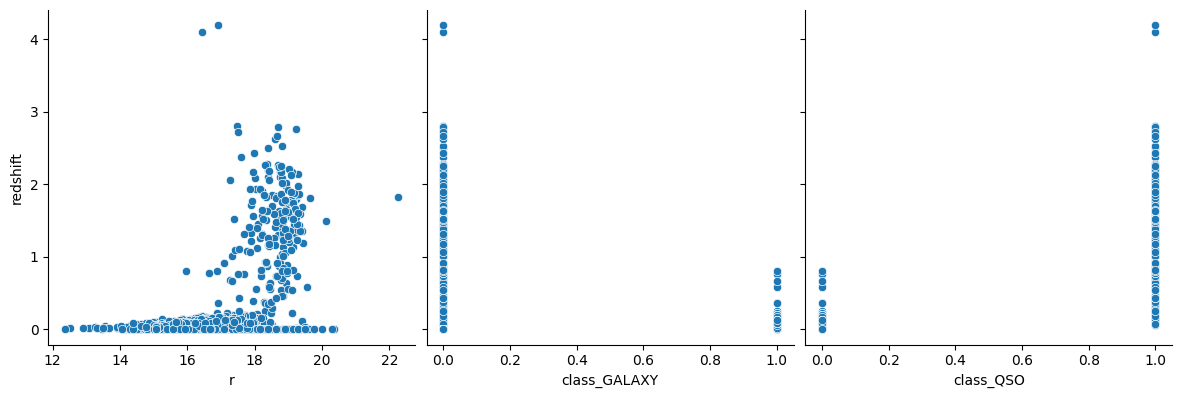

In [1002]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="redshift", x_vars=features2, kind="scatter")

In [1003]:
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [1004]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [1005]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,r,7.522371e-02
1,class_GALAXY,1.197290e+11
2,class_QSO,8.393591e+08
3,r^2,-7.548523e-02
4,r class_GALAXY,1.225166e-01
5,r class_QSO,1.126831e+00
6,class_GALAXY^2,-1.197290e+11
7,class_GALAXY class_QSO,0.000000e+00
8,class_QSO^2,-8.393591e+08


In [1006]:
print("MAE:")
print("Train:", metrics.mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", metrics.mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 0.05022949036806972
Test: 0.05858262117686262

RMSE:
Train: 0.18138435955236978
Test: 0.18114226193549365


## Normalidad de los errores

In [1007]:
import scipy.stats as stats

In [1051]:
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=4, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [1052]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [1053]:
errors = (pipeline.predict(X_train[features2])-y_train).values

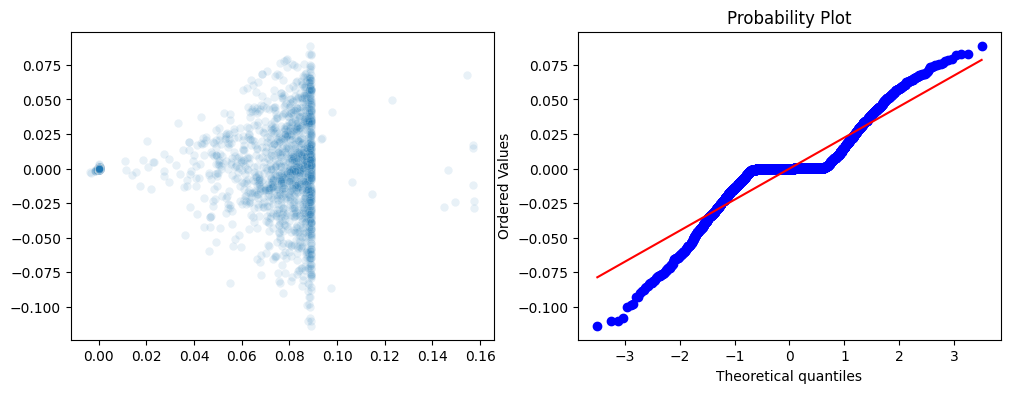

In [1054]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features2]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

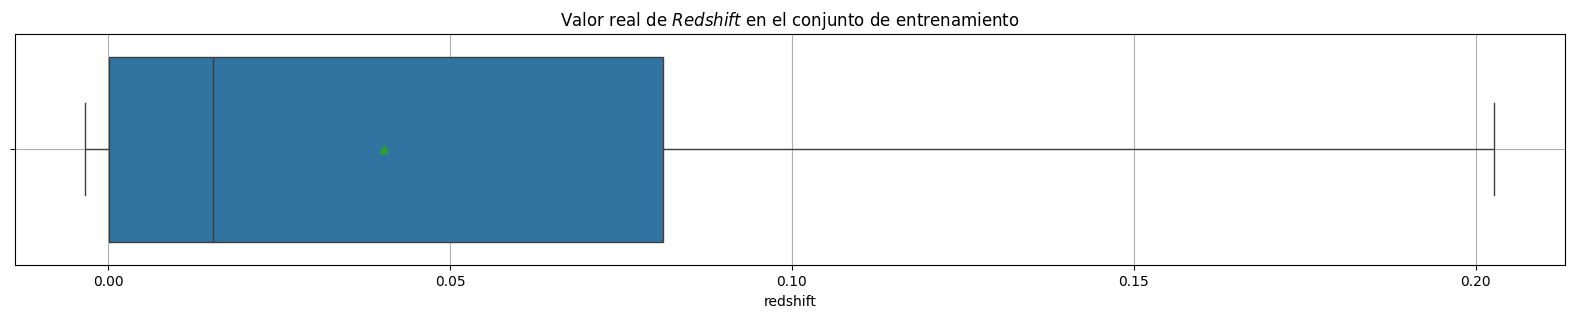

In [1055]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{Redshift}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

In [1056]:
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

0.202893944325

In [1057]:
y_train.describe()

count    2971.000000
mean        0.040350
std         0.047341
min        -0.003322
25%         0.000081
50%         0.015349
75%         0.081206
max         0.202720
Name: redshift, dtype: float64

In [1058]:
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [1059]:
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [1060]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [1061]:
pd.DataFrame({"columns": features2, "coef": pipeline["model"].coef_})

ValueError: All arrays must be of the same length

In [1062]:
print("MAE:")
print("Train:", metrics.mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", metrics.mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 0.013679670644645217
Test: 0.014087813579902245

RMSE:
Train: 0.024323965832667088
Test: 0.026185030714867344


In [1063]:
y_train.describe()

count    2971.000000
mean        0.040350
std         0.047341
min        -0.003322
25%         0.000081
50%         0.015349
75%         0.081206
max         0.202720
Name: redshift, dtype: float64

In [1064]:
errors = (pipeline.predict(X_train[features2])-y_train).values

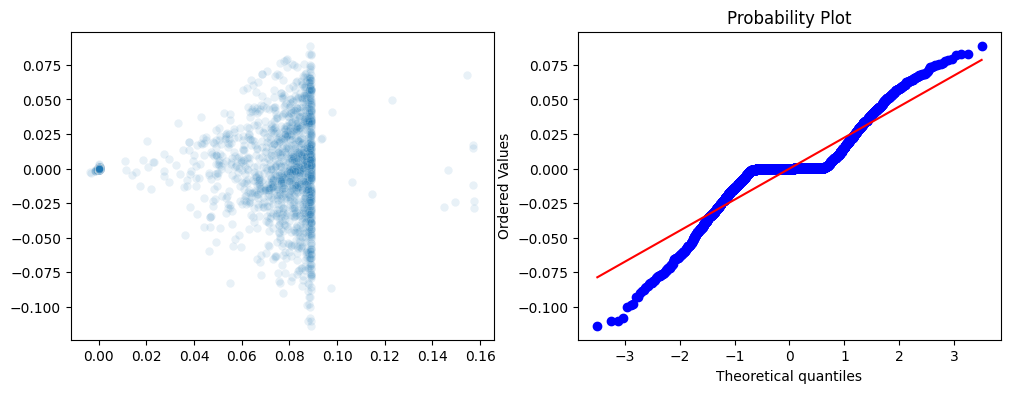

In [1065]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features2]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

## Varianza constante

<AxesSubplot: >

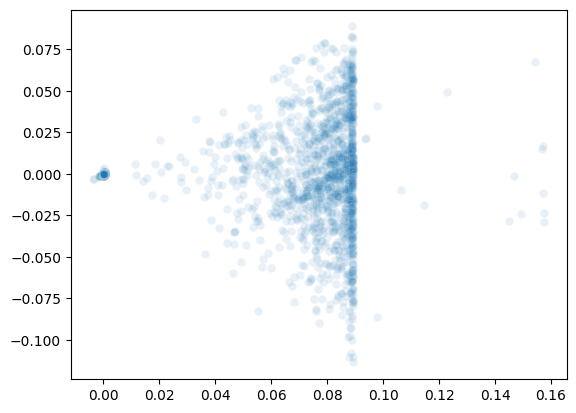

In [1066]:
sns.scatterplot(x = pipeline.predict(X_train[features2]), y=errors, alpha=0.1)

# Persistencia

In [ ]:
filename = "model.joblib"


In [ ]:
dump(pipeline, filename)

In [ ]:
pipeline_loaded = load(filename)